In [ ]:
%env CUDA_VISIBLE_DEVICES=0

In [9]:
# List Environments
xminigrid.registered_environments()

('XLand-MiniGrid-R1-9x9',
 'XLand-MiniGrid-R1-13x13',
 'XLand-MiniGrid-R1-17x17',
 'XLand-MiniGrid-R2-9x9',
 'XLand-MiniGrid-R2-13x13',
 'XLand-MiniGrid-R2-17x17',
 'XLand-MiniGrid-R4-9x9',
 'XLand-MiniGrid-R4-13x13',
 'XLand-MiniGrid-R4-17x17',
 'XLand-MiniGrid-R6-13x13',
 'XLand-MiniGrid-R6-17x17',
 'XLand-MiniGrid-R6-19x19',
 'XLand-MiniGrid-R9-16x16',
 'XLand-MiniGrid-R9-19x19',
 'XLand-MiniGrid-R9-25x25',
 'MiniGrid-BlockedUnlockPickUp',
 'MiniGrid-DoorKey-5x5',
 'MiniGrid-DoorKey-6x6',
 'MiniGrid-DoorKey-8x8',
 'MiniGrid-DoorKey-16x16',
 'MiniGrid-Empty-5x5',
 'MiniGrid-Empty-6x6',
 'MiniGrid-Empty-8x8',
 'MiniGrid-Empty-16x16',
 'MiniGrid-EmptyRandom-5x5',
 'MiniGrid-EmptyRandom-6x6',
 'MiniGrid-EmptyRandom-8x8',
 'MiniGrid-EmptyRandom-16x16',
 'MiniGrid-FourRooms',
 'MiniGrid-LockedRoom',
 'MiniGrid-MemoryS8',
 'MiniGrid-MemoryS16',
 'MiniGrid-MemoryS32',
 'MiniGrid-MemoryS64',
 'MiniGrid-MemoryS128',
 'MiniGrid-Playground',
 'MiniGrid-Unlock',
 'MiniGrid-UnlockPickUp')

In [2]:
import jax
import xminigrid
from xminigrid.wrappers import GymAutoResetWrapper
from xminigrid.experimental.img_obs import RGBImgObservationWrapper

key = jax.random.PRNGKey(0)
reset_key, ruleset_key = jax.random.split(key)

# to list available benchmarks: xminigrid.registered_benchmarks()
benchmark = xminigrid.load_benchmark(name="trivial-1m")
# choosing ruleset, see section on rules and goals
ruleset = benchmark.sample_ruleset(ruleset_key)

# to list available environments: xminigrid.registered_environments()
env, env_params = xminigrid.make("XLand-MiniGrid-R9-25x25")
env_params = env_params.replace(ruleset=ruleset)

# auto-reset wrapper
env = GymAutoResetWrapper(env)

# render obs as rgb images if needed (warn: this will affect speed greatly)
env = RGBImgObservationWrapper(env)

# fully jit-compatible step and reset methods
timestep = jax.jit(env.reset)(env_params, reset_key)
timestep = jax.jit(env.step)(env_params, timestep, action=0)

# optionally render the state
rendered = env.render(env_params, timestep)

In [13]:
images = []
import jax.tree_util as jtu

for i in range(100):
    timestep = jtu.tree_map(lambda x: x[i], rendered)
    images.append(env.render(env_params, timestep))

AttributeError: 'numpy.ndarray' object has no attribute 'state'

In [11]:
show_img(rendered[0])

In [3]:
from matplotlib import pyplot as plt

states_to_show = max(10, len(rendered))
f, ax = plt.subplots(states_to_show, 1, figsize=(8, 8))
for step, state in enumerate(rendered[:states_to_show]):
    ax[step].imshow(state)

Error in callback <function flush_figures at 0x7fb0ac3c2b90> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [3]:
# utils for the demonstation
from xminigrid.core.grid import room
from xminigrid.types import AgentState
from xminigrid.core.actions import take_action
from xminigrid.core.constants import Tiles, Colors, TILES_REGISTRY
from xminigrid.rendering.rgb_render import render
import jax.numpy as jnp

# rules and goals
from xminigrid.core.goals import check_goal, AgentNearGoal
from xminigrid.core.rules import check_rule, AgentNearRule


import matplotlib.pyplot as plt


def show_img(img, dpi=32):
    plt.figure(dpi=dpi)
    plt.axis("off")
    plt.imshow(img)

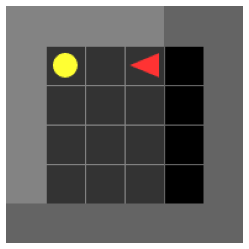

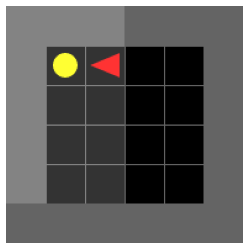

In [4]:
# for testing
grid = room(6, 6)
grid = grid.at[1, 1].set(TILES_REGISTRY[Tiles.BALL, Colors.YELLOW])

agent = AgentState(position=jnp.array((1, 3)), direction=3)

# taking move forward action
move_forward_action = jnp.asarray(0)
new_grid, new_agent, position = take_action(grid, agent, move_forward_action)

show_img(render(grid, agent), dpi=64)
show_img(render(new_grid, new_agent), dpi=64)